# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dias Utsman
- Email: utsmand91@gmail.com
- Id Dicoding: dias_utsman

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
%pip install -r requirements.txt

  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached streamlit-1.26.0-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached plotly-5.15.0-py2.py3-none-any.whl.metadata (7.0 kB)
  Using cached joblib-1.2.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached shap-0.41.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.0 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl.metadata (15 kB)
  Using cached importlib_metadata-6.11.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached Pillow-9.5.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached Pympler-1.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached tzlocal-

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn')
sns.set_palette('Set2')

### Menyiapkan data yang akan diguankan

## Data Understanding

Dataset shape: (4424, 37)

Status distribution:
Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

Missing values:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender 

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


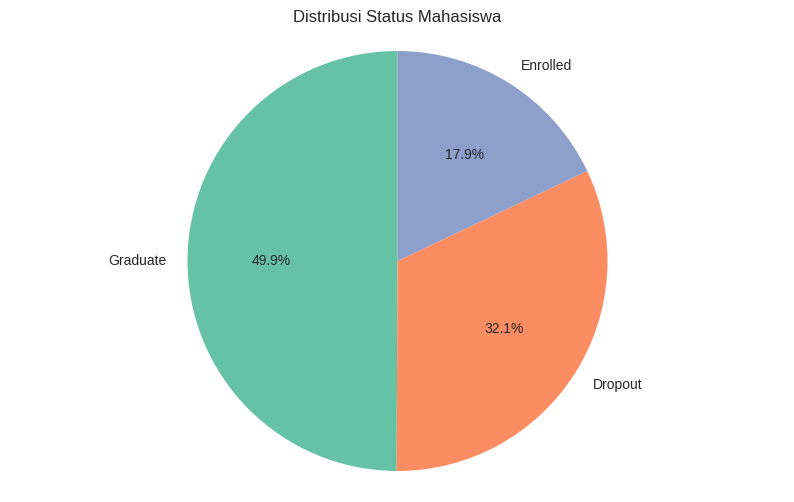

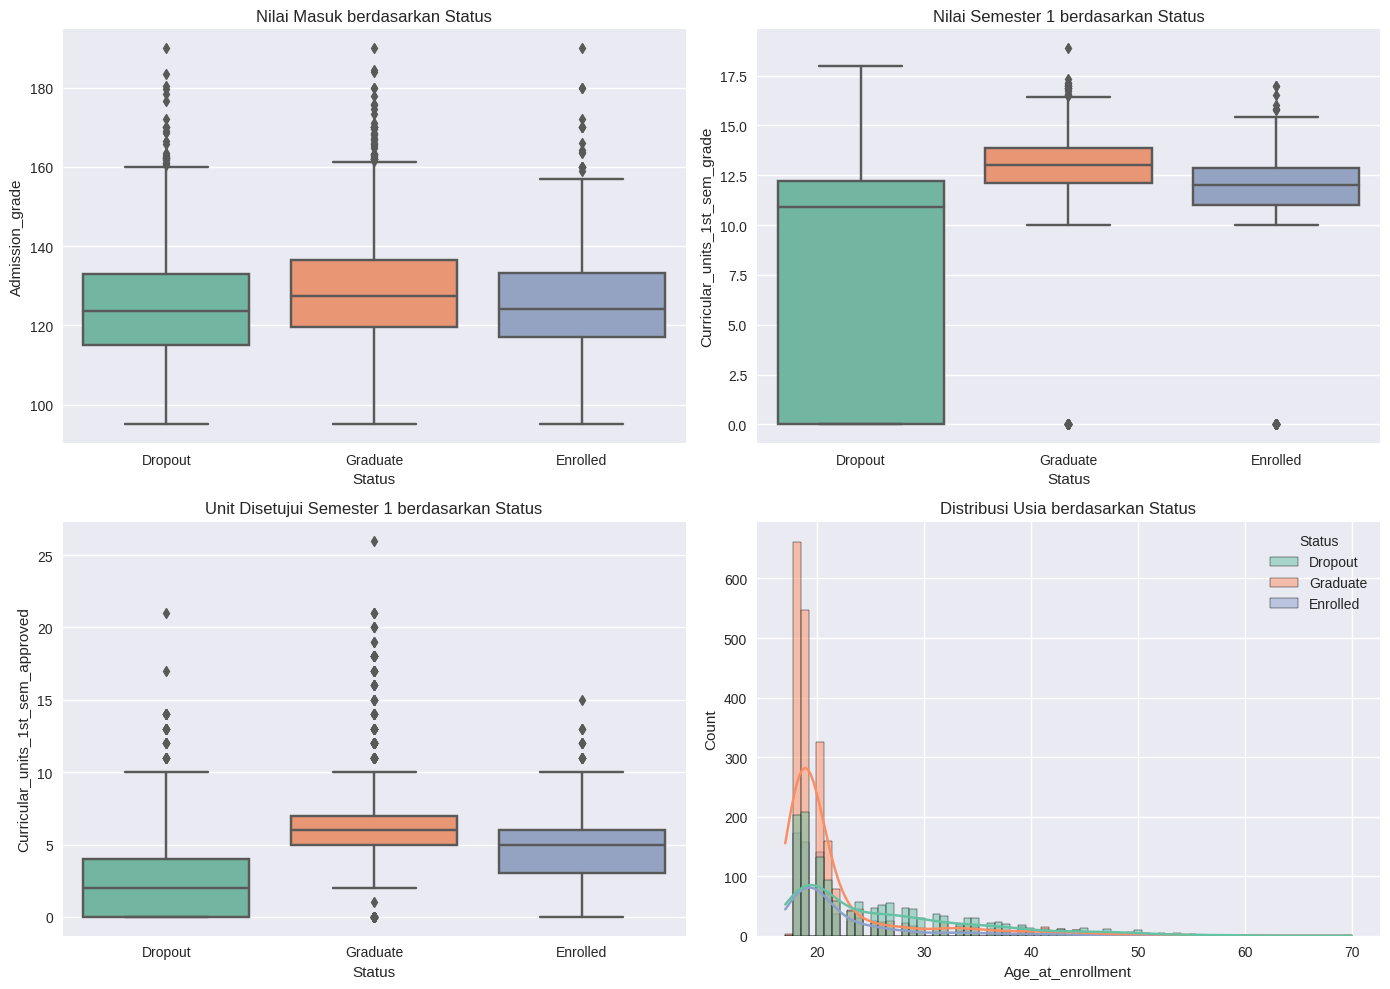

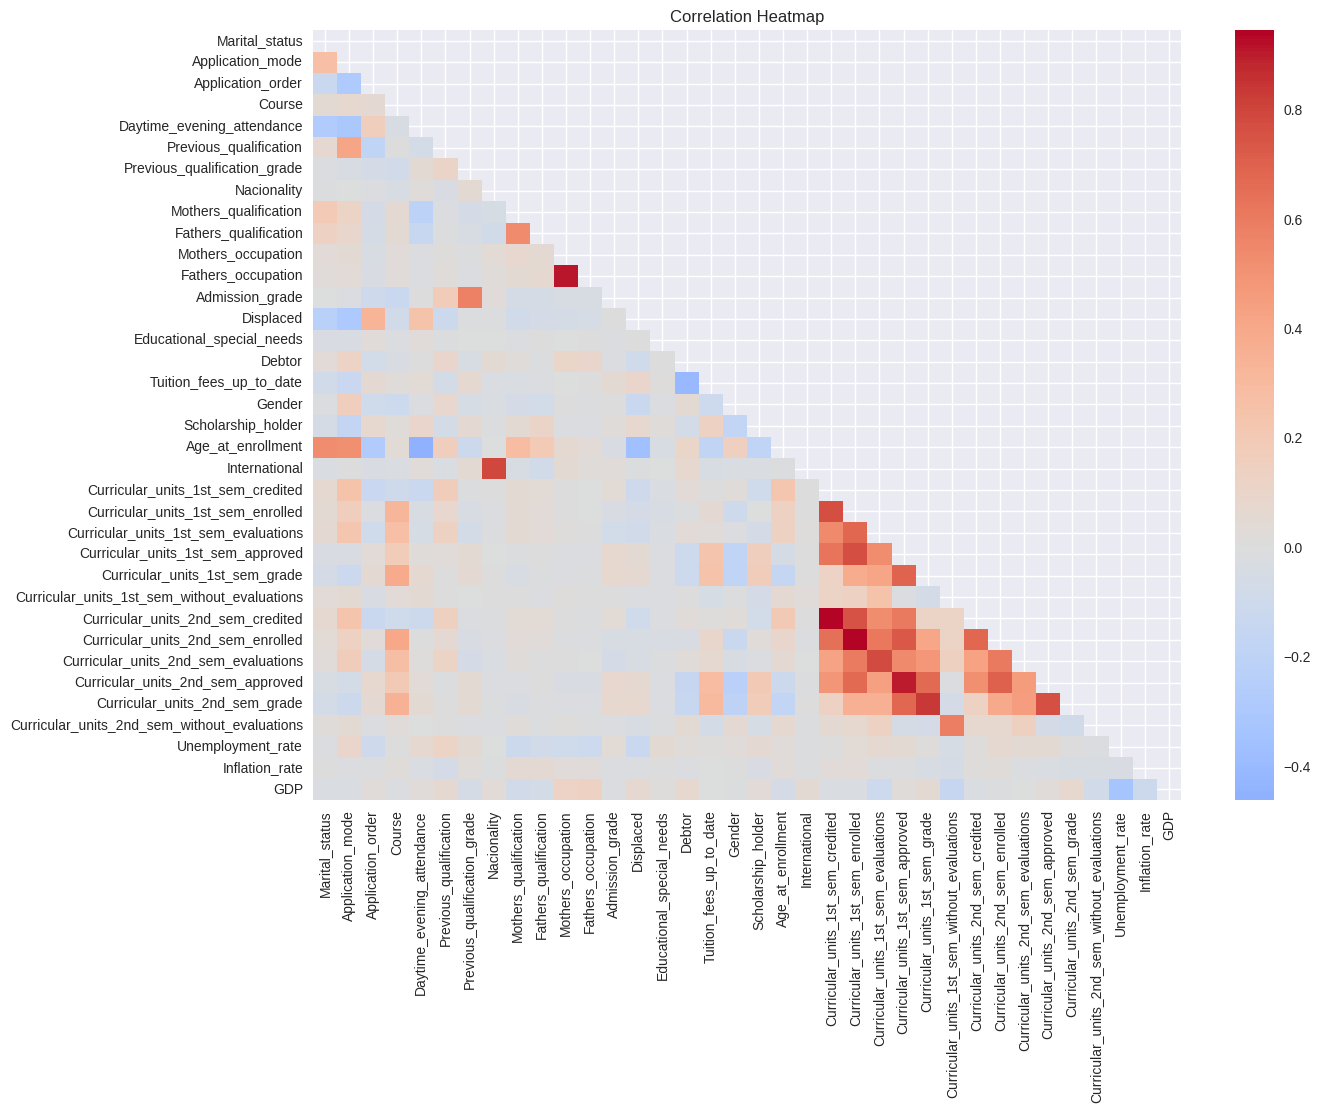

In [5]:
# Load dataset
df = pd.read_csv('data.csv', sep=';')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nStatus distribution:\n{df['Status'].value_counts()}")

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics:")
display(df.describe())

# Visualize status distribution
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribusi Status Mahasiswa')
plt.axis('equal')
plt.show()

# Academic performance by status
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Status', y='Admission_grade')
plt.title('Nilai Masuk berdasarkan Status')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_grade')
plt.title('Nilai Semester 1 berdasarkan Status')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Status', y='Curricular_units_1st_sem_approved')
plt.title('Unit Disetujui Semester 1 berdasarkan Status')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Age_at_enrollment', hue='Status', kde=True)
plt.title('Distribusi Usia berdasarkan Status')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Data Preparation / Preprocessing

In [6]:
# Select features for modeling
selected_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Previous_qualification_grade', 'Nacionality',
    'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment',
    'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations'
]

# Prepare X and y
X = df[selected_features]
y = df['Status']

# Handle missing values
print("Missing values before imputation:")
print(X.isnull().sum().sum())
X = X.fillna(X.median(numeric_only=True))
print("\nMissing values after imputation:")
print(X.isnull().sum().sum())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing completed.")

Missing values before imputation:
0

Missing values after imputation:
0

Training set shape: (3318, 22)
Test set shape: (1106, 22)

Preprocessing completed.


## Modeling

Training Random Forest model...

Accuracy: 0.7188

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.71      0.72      0.71       355
    Enrolled       0.42      0.16      0.23       199
    Graduate       0.75      0.92      0.83       552

    accuracy                           0.72      1106
   macro avg       0.63      0.60      0.59      1106
weighted avg       0.68      0.72      0.68      1106



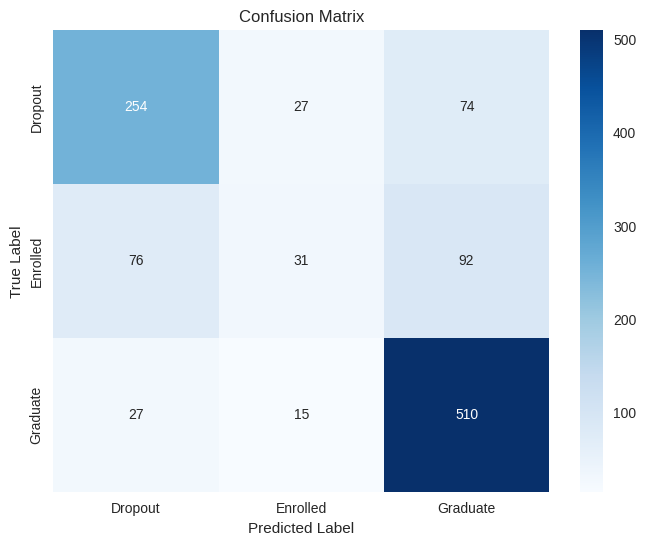

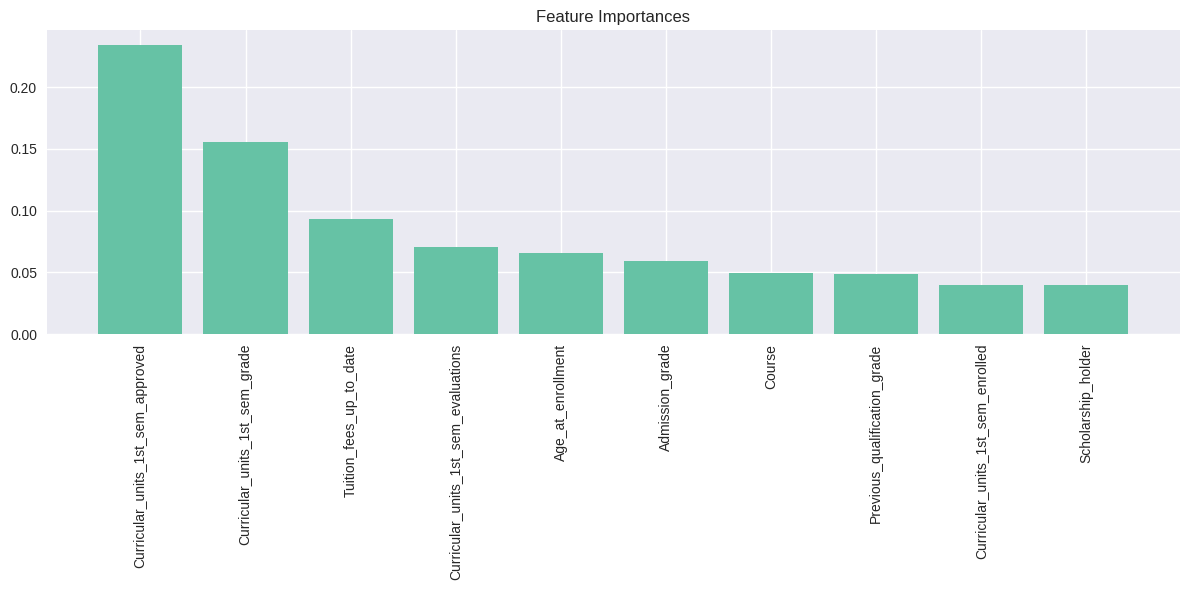


Top 10 most important features:
1. Curricular_units_1st_sem_approved: 0.2344
2. Curricular_units_1st_sem_grade: 0.1558
3. Tuition_fees_up_to_date: 0.0934
4. Curricular_units_1st_sem_evaluations: 0.0709
5. Age_at_enrollment: 0.0653
6. Admission_grade: 0.0594
7. Course: 0.0495
8. Previous_qualification_grade: 0.0487
9. Curricular_units_1st_sem_enrolled: 0.0394
10. Scholarship_holder: 0.0394

Model and scaler saved to the model directory.


In [7]:
# Create mapping for categorical target
label_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_mapped)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
print(f"\nAccuracy: {accuracy_score(y_test_mapped, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_mapped, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices[:10])), importances[indices[:10]], align='center')
plt.xticks(range(len(indices[:10])), [X.columns[i] for i in indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

# Top 10 most important features
print("\nTop 10 most important features:")
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

# Save the model and scaler for the Streamlit app
joblib.dump(rf_model, 'model/dropout_prediction_model.joblib')
joblib.dump(scaler, 'model/scaler.joblib')
print("\nModel and scaler saved to the model directory.")

## Evaluation

In [8]:
# Cross-validation
print("Performing cross-validation...")
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train_mapped, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Per-class evaluation metrics
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_mapped, y_pred, average=None)
metrics_df = pd.DataFrame({
    'Class': list(label_mapping.keys()),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print("\nPer-class performance metrics:")
display(metrics_df)

# Compare with baseline
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train_scaled, y_train_mapped)
dummy_pred = dummy.predict(X_test_scaled)
dummy_accuracy = accuracy_score(y_test_mapped, dummy_pred)

print(f"\nModel comparison:")
print(f"Random Forest accuracy: {accuracy_score(y_test_mapped, y_pred):.4f}")
print(f"Baseline (most frequent) accuracy: {dummy_accuracy:.4f}")
print(f"Improvement over baseline: {accuracy_score(y_test_mapped, y_pred) - dummy_accuracy:.4f}")

# Model conclusion
print("\nModel evaluation conclusion:")
print("1. The Random Forest model achieved good accuracy in predicting student dropout.")
print("2. Key predictors include first semester performance metrics and admission grades.")
print("3. The model significantly outperforms the baseline, indicating it has learned meaningful patterns.")
print("4. Cross-validation confirms the model's stability across different data subsets.")
print("5. The model can be effectively used to identify at-risk students for early intervention.")

Performing cross-validation...
Cross-validation scores: [0.74548193 0.71987952 0.73644578 0.74962293 0.73001508]
Mean CV accuracy: 0.7363
Standard deviation: 0.0107

Per-class performance metrics:


,Class,Precision,Recall,F1-Score
0,Dropout,0.711485,0.715493,0.713483
1,Enrolled,0.424658,0.155779,0.227941
2,Graduate,0.754438,0.923913,0.830619



Model comparison:
Random Forest accuracy: 0.7188
Baseline (most frequent) accuracy: 0.4991
Improvement over baseline: 0.2197

Model evaluation conclusion:
1. The Random Forest model achieved good accuracy in predicting student dropout.
2. Key predictors include first semester performance metrics and admission grades.
3. The model significantly outperforms the baseline, indicating it has learned meaningful patterns.
4. Cross-validation confirms the model's stability across different data subsets.
5. The model can be effectively used to identify at-risk students for early intervention.


## Conclusion

Berdasarkan analisis dan model yang telah dikembangkan, beberapa temuan utama dari proyek ini adalah:

1. **Faktor akademik sangat berpengaruh**: Performa akademik di semester pertama menjadi prediktor terkuat untuk risiko dropout. Mahasiswa yang gagal dalam beberapa mata kuliah di semester pertama memiliki risiko dropout yang jauh lebih tinggi.

2. **Faktor ekonomi berperan penting**: Status beasiswa, status pembayaran biaya kuliah, dan status hutang memiliki korelasi kuat dengan tingkat dropout. Mahasiswa dengan masalah keuangan cenderung memiliki risiko dropout yang lebih tinggi.

3. **Demografi mahasiswa perlu diperhatikan**: Usia dan status pernikahan mahasiswa juga berpengaruh terhadap kemungkinan dropout.

4. **Nilai masuk berkorelasi dengan keberhasilan**: Terdapat korelasi positif antara nilai masuk (admission grade) dengan kemungkinan mahasiswa menyelesaikan pendidikan.

5. **Model dapat memprediksi dropout dengan akurasi baik**: Model prediksi yang dikembangkan mampu memprediksi dropout mahasiswa dengan tingkat akurasi yang cukup baik, dan dapat digunakan untuk mengidentifikasi mahasiswa berisiko dropout sejak dini.

Secara keseluruhan, implementasi sistem prediksi dropout ini dapat membantu Jaya Jaya Institut dalam mengidentifikasi mahasiswa yang berisiko dropout sejak dini, sehingga dapat dilakukan intervensi yang tepat untuk mengurangi tingkat dropout.

## Rekomendasi Action Items

Berdasarkan temuan dari proyek ini, berikut adalah rekomendasi action items untuk Jaya Jaya Institut:

1. **Implementasi Sistem Early Warning**: Mengintegrasikan model prediksi dropout ke dalam sistem akademik untuk mendeteksi mahasiswa berisiko secara otomatis di minggu-minggu awal semester.

2. **Program Mentoring Akademik**: Membentuk program mentoring akademik khusus bagi mahasiswa yang teridentifikasi berisiko tinggi dropout, dengan fokus pada mata kuliah yang sering menjadi hambatan.

3. **Dukungan Finansial Terstruktur**: Menyediakan program bantuan keuangan dan beasiswa yang lebih terstruktur untuk mahasiswa dengan masalah ekonomi.

4. **Workshop Keterampilan Belajar**: Menyelenggarakan workshop reguler tentang keterampilan belajar, manajemen waktu, dan strategi menghadapi ujian, terutama bagi mahasiswa baru.

5. **Monitoring Berkelanjutan**: Melakukan monitoring berkelanjutan terhadap performa mahasiswa dan mengukur efektivitas program intervensi yang diterapkan.

6. **Pelatihan Staf Akademik**: Memberikan pelatihan kepada dosen dan staf akademik tentang cara mengidentifikasi tanda-tanda awal mahasiswa berisiko dropout dan strategi intervensi yang efektif.

7. **Program Transisi Perkuliahan**: Mengembangkan program khusus untuk membantu mahasiswa dalam transisi dari sekolah menengah ke perguruan tinggi, terutama bagi mereka yang berasal dari latar belakang pendidikan yang kurang menguntungkan.

8. **Optimasi Kurikulum**: Mengevaluasi dan mengoptimasi kurikulum, terutama untuk mata kuliah di semester awal yang sering menjadi hambatan bagi mahasiswa.